In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
display(HTML("<style>pre { white-space: pre !important; }</style>"))
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('A4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 02:33:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import numpy as np

In [3]:
# data schema
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,DoubleType)
data_schema = [StructField('HeartDiseaseorAttack',DoubleType(),True),
               StructField('HighBP',DoubleType(),True),
               StructField('HighChol',DoubleType(),True),
               StructField('CholCheck',DoubleType(),True),
               StructField('BMI',DoubleType(),True),
               StructField('Smoker',DoubleType(),True),
               StructField('Stroke',DoubleType(),True),
               StructField('Diabetes',DoubleType(),True),
               StructField('PhysActivity',DoubleType(),True),
               StructField('Fruits',DoubleType(),True),
               StructField('Veggies',DoubleType(),True),
               StructField('HvyAlcoholConsump',DoubleType(),True),
               StructField('AnyHealthcare',DoubleType(),True),
               StructField('NoDocbcCost',DoubleType(),True),
               StructField('GenHlth',DoubleType(),True),
               StructField('MentHlth',DoubleType(),True),
               StructField('PhysHlth',DoubleType(),True),
               StructField('DiffWalk',DoubleType(),True),
               StructField('Sex',DoubleType(),True),
               StructField('Age',DoubleType(),True),
               StructField('Education',StringType(),True),
              StructField('Income',DoubleType(),True),
              StructField('ID',DoubleType(),True),
              StructField('DB_Section',DoubleType(),True)]
final_struct = StructType(fields=data_schema)


In [4]:
df1 = spark.read.json('A4-dataset/ds1.json', schema=final_struct)
df2 = spark.read.csv('A4-dataset/ds2.csv', header=True, schema=final_struct)


In [5]:
df1.describe().show()

+-------+--------------------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+----------+
|summary|HeartDiseaseorAttack|            HighBP|           HighChol|          CholCheck|              BMI|             Smoker|             Stroke|           Diabetes|      PhysActivity|            Fruits|            Veggies|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           GenHlth|         MentHlth|         PhysHlth|           DiffWalk|                Sex|               Age|         Education|            Income|               ID|DB_Section|
+-------+--------------------+------------------+-----------------

In [6]:
df2.describe().show()

+-------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+-----------------+-----------------+----------+
|summary|HeartDiseaseorAttack|             HighBP|           HighChol|          CholCheck|               BMI|             Smoker|             Stroke|           Diabetes|       PhysActivity|            Fruits|            Veggies|   HvyAlcoholConsump|     AnyHealthcare|        NoDocbcCost|           GenHlth|         MentHlth|         PhysHlth|           DiffWalk|                Sex|               Age|         Education|           Income|               ID|DB_Section|
+-------+--------------------+-------------------+------------

In [7]:
# Combine df1 and df2
df = df2.unionByName(df1)
df.describe().show()

+-------+--------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+----------+
|summary|HeartDiseaseorAttack|             HighBP|           HighChol|         CholCheck|               BMI|             Smoker|             Stroke|           Diabetes|       PhysActivity|             Fruits|           Veggies|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           GenHlth|         MentHlth|          PhysHlth|           DiffWalk|               Sex|               Age|         Education|            Income|                ID|DB_Section|
+-------+--------------------+-------------------+----------

24/05/23 02:34:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/23 02:34:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/23 02:34:05 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.
/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


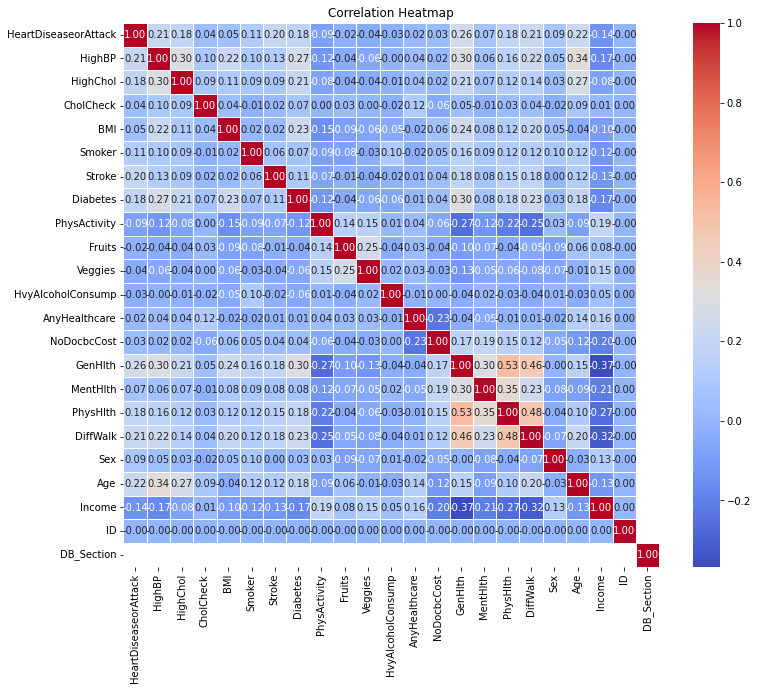

In [8]:
#DU - 2.3 Correlation Matrix
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

df_tmp = df.drop("Education")
assembler = VectorAssembler(inputCols=df_tmp.columns, outputCol="features", handleInvalid = "skip")
df_vector = assembler.transform(df2).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]
correlation_matrix = correlation_matrix.toArray()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=df_tmp.columns, yticklabels=df_tmp.columns)
plt.title("Correlation Heatmap")
plt.show()


Text(0.5, 1.0, 'Distribution of Heart Disease or Attack')

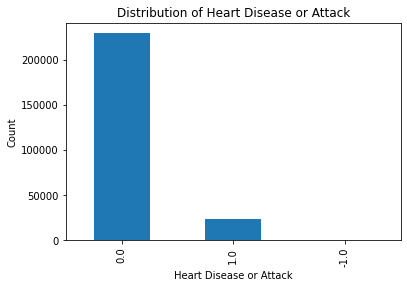

In [9]:
#DU - 2.3.1 "HeartDiseaseorAttack" distribution
df_pandas = df.select("HeartDiseaseorAttack").toPandas()
distribution = df_pandas["HeartDiseaseorAttack"].value_counts()
distribution.plot(kind='bar')

plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease or Attack')

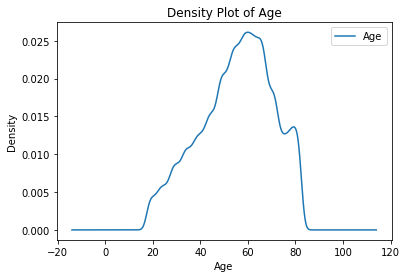

In [10]:
#DU - 2.3.1 "Age" density plot
age_df = df.select("Age").toPandas()
age_df.plot(kind='density')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age')
plt.show()

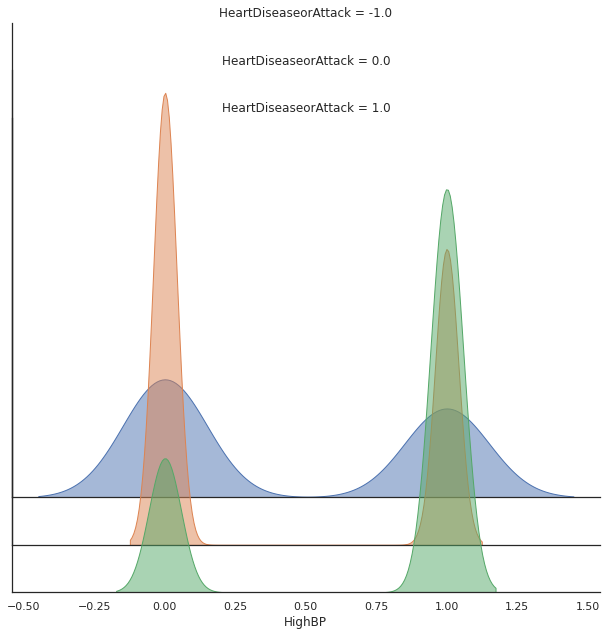

In [11]:
#DU - 2.3.1
# ridge density plot
temp_df = df.select("HeartDiseaseorAttack", "HighBP").toPandas()
sns.set_theme(style="white", rc={"axes.facecolor": (0,0,0,0)})
sns.FacetGrid(temp_df, row='HeartDiseaseorAttack', hue='HeartDiseaseorAttack', aspect=3).map_dataframe(sns.kdeplot, x='HighBP', fill='True', alpha=0.5).\
set(yticks=[],ylabel='').figure.subplots_adjust(hspace=-0.9)

In [12]:
#DU - 2.4.1 - missing values
total_rows = df.count()
from pyspark.sql.functions import col
def null_count_and_percentage(df):
    null_counts = {}
    for col_name in df.columns:
        null_count = df.filter(col(col_name).isNull()).count()
        non_null_percentage = (1-(null_count / total_rows)) * 100
        print(col_name, "Null values count:", null_count, non_null_percentage, "% Complete")
    return null_counts
null_count_and_percentage(df)

HeartDiseaseorAttack Null values count: 0 100.0 % Complete
HighBP Null values count: 0 100.0 % Complete
HighChol Null values count: 0 100.0 % Complete
CholCheck Null values count: 0 100.0 % Complete
BMI Null values count: 0 100.0 % Complete
Smoker Null values count: 0 100.0 % Complete
Stroke Null values count: 0 100.0 % Complete
Diabetes Null values count: 0 100.0 % Complete
PhysActivity Null values count: 0 100.0 % Complete
Fruits Null values count: 1280 99.49542730999684 % Complete
Veggies Null values count: 0 100.0 % Complete
HvyAlcoholConsump Null values count: 0 100.0 % Complete
AnyHealthcare Null values count: 29000 88.56827499211605 % Complete
NoDocbcCost Null values count: 0 100.0 % Complete
GenHlth Null values count: 0 100.0 % Complete
MentHlth Null values count: 5300 97.91075370545569 % Complete
PhysHlth Null values count: 0 100.0 % Complete
DiffWalk Null values count: 0 100.0 % Complete
Sex Null values count: 0 100.0 % Complete
Age Null values count: 0 100.0 % Complete
Educa

DB_Section Null values count: 84560 66.66666666666667 % Complete


{}

In [13]:
#DU - 2.4.1 - Outliers and extreme values
from pyspark.sql.functions import mean, stddev, col

# Calculate mean and standard deviation for "BMI"
bmi_stats = df.select(mean(col("BMI")).alias("mean_bmi"), stddev(col("BMI")).alias("stddev_bmi")).collect()
mean_bmi = bmi_stats[0]["mean_bmi"]
stddev_bmi = bmi_stats[0]["stddev_bmi"]

# Compute z-scores for "BMI"
tmp_df = df.withColumn("z_score", (col("BMI") - mean_bmi) / stddev_bmi)

outlier_condition = (((col("z_score") > 2) & (col("z_score") <= 3)) | ((col("z_score") < -2) & (col("z_score") >= -3)))
extreme_value_condition = ((col("z_score") > 3) | (col("z_score") < -3))

# Count outliers and extreme values
outliers_count = tmp_df.filter(outlier_condition).count()
extreme_values_count = tmp_df.filter(extreme_value_condition).count()

print(f"Outliers count: {outliers_count}")
print(f"Extreme values count: {extreme_values_count}")

Outliers count: 7057
Extreme values count: 2963


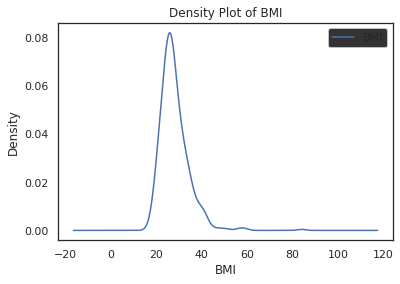

In [14]:
#DU - 2.4.2 BMI density
tmp_df = df.select("BMI").toPandas()
tmp_df.sample(500).plot(kind='density')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Density Plot of BMI')
plt.show()

In [15]:
#DU - 2.4.3 - checking errors - 'Education'
unknown_count = df.filter(col("Education") == "Unknown").count()
print(f"Count of 'Unknown' values in 'Education': {unknown_count}")

Count of 'Unknown' values in 'Education': 174


In [16]:
#DU - 2.4.3 - checking errors - 'HeartDiseaseorAttack'
err_count = df.filter((col("HeartDiseaseorAttack") != 0) & (col("HeartDiseaseorAttack") != 1)).count()
print(f"Count of error values in 'HeartDiseaseorAttack': {err_count}")

Count of error values in 'HeartDiseaseorAttack': 398


In [17]:
#DP - 3.1 Data selection
print(df.count())


253680


In [18]:
#DP - 3.2.1 Remove the feature "AnyHealthCare"
df = df.drop("AnyHealthCare")
df.printSchema()

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: double (nullable = true)
 |-- ID: double (nullable = true)
 |-- DB_Section: double (nullable = true)



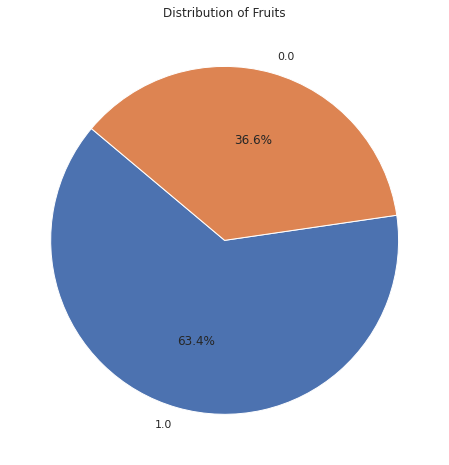

In [19]:
#DP - 3.2.2 "Fruits" distribution
df_pandas = df.select("Fruits").toPandas()
value_counts = df_pandas["Fruits"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fruits')
plt.show()

In [20]:
# DP 3.2.2- Imputing the missing values in “Fruits” with the value “0”
null_count_before = df.filter(col("Fruits").isNull()).count()
print(f"Null value count in 'Fruits' before imputation: {null_count_before}")
df = df.na.fill(value=0, subset=["Fruits"])
null_count = df.filter(col("Fruits").isNull()).count()
print(f"Null value count in 'Fruits' after imputation: {null_count}")

Null value count in 'Fruits' before imputation: 1280
Null value count in 'Fruits' after imputation: 0


/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MentHlth', ylabel='Density'>

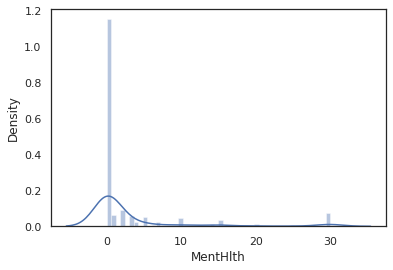

In [21]:
#DP - 3.2.3 "MentHlth" distribution
tmp_df = df.select("MentHlth").toPandas()
sns.distplot(tmp_df['MentHlth'].sample(1000))

In [22]:
# DP 3.2.3- Imputing the missing values in “MentHlth” with the value “0”
null_count_before = df.filter(col("MentHlth").isNull()).count()
print(f"Null value count in 'MentHlth' before imputation: {null_count_before}")
df = df.na.fill(value=0, subset=["MentHlth"])
null_count = df.filter(col("Fruits").isNull()).count()
print(f"Null value count in 'MentHlth' after imputation: {null_count}")

Null value count in 'MentHlth' before imputation: 5300
Null value count in 'MentHlth' after imputation: 0


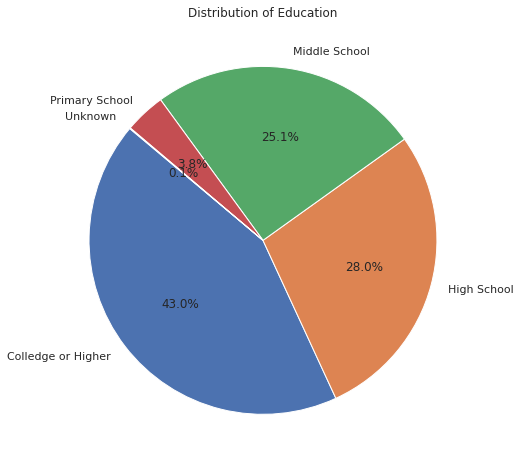

In [23]:
# DP 3.2.3- "Education" distribution
df_pandas = df.select("Education").toPandas()
value_counts = df_pandas["Education"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education')
plt.show()

Null value count in 'Education' before imputation: 4043
Null value count in 'Education' after imputation: 0


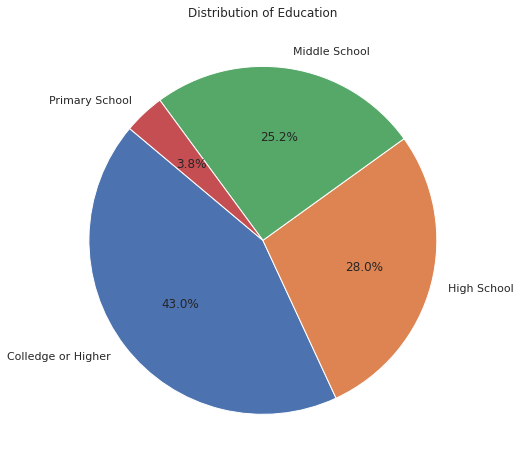

In [24]:
# DP 3.2.3- Delete all the rows with “Unknown” or null value in “Education”
null_count_before = df.filter(col("Education").isNull()).count()
print(f"Null value count in 'Education' before imputation: {null_count_before}")
df = df.filter((col("Education") != "Unknown") & col("Education").isNotNull())
null_count = df.filter(col("Education").isNull()).count()
print(f"Null value count in 'Education' after imputation: {null_count}")

df_pandas = df.select("Education").toPandas()
value_counts = df_pandas["Education"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education')
plt.show()

In [25]:
# DP 3.2.4 - Outliers and extreme values in "BMI"
# Calculate mean and standard deviation for "BMI"
bmi_stats = df.select(mean(col("BMI")).alias("mean_bmi"), stddev(col("BMI")).alias("stddev_bmi")).collect()
mean_bmi = bmi_stats[0]["mean_bmi"]
stddev_bmi = bmi_stats[0]["stddev_bmi"]

# Compute z-scores for "BMI"
tmp_df = df.withColumn("z_score", (col("BMI") - mean_bmi) / stddev_bmi)

outlier_condition = (((col("z_score") > 2) & (col("z_score") <= 3)) | ((col("z_score") < -2) & (col("z_score") >= -3)))
extreme_value_condition = ((col("z_score") > 3) | (col("z_score") < -3))

# Count outliers and extreme values
outliers = tmp_df.filter(outlier_condition)
extreme_values = tmp_df.filter(extreme_value_condition)

print(f"Outliers count: {outliers.count()}")
print(f"Extreme values count: {extreme_values.count()}")

Outliers count: 6904
Extreme values count: 2872


In [26]:
# DP 3.2.4 - Delete extreme values in "BMI"
print("Row count before removing extremes in BMI:", df.count())
df_exclude_extreme = tmp_df.filter(~extreme_value_condition)
df = df_exclude_extreme.drop("z_score")
print("Row count after removing extremes in BMI:", df.count())

Row count before removing extremes in BMI: 249463
Row count after removing extremes in BMI: 246591


In [27]:
# DP 3.2.5 - Delete the rows with error values in “HeartAttackorDisease”
err_count = df.filter((col("HeartDiseaseorAttack") != 0) & (col("HeartDiseaseorAttack") != 1)).count()
print(f"Count of error values in 'HeartDiseaseorAttack' before: {err_count}")
df = df.filter((col("HeartDiseaseorAttack") == 0) | (col("HeartDiseaseorAttack") == 1))
err_count = df.filter((col("HeartDiseaseorAttack") != 0) & (col("HeartDiseaseorAttack") != 1)).count()
print(f"Count of error values in 'HeartDiseaseorAttack' after: {err_count}")
print(df.count())

Count of error values in 'HeartDiseaseorAttack' before: 383
Count of error values in 'HeartDiseaseorAttack' after: 0
246208


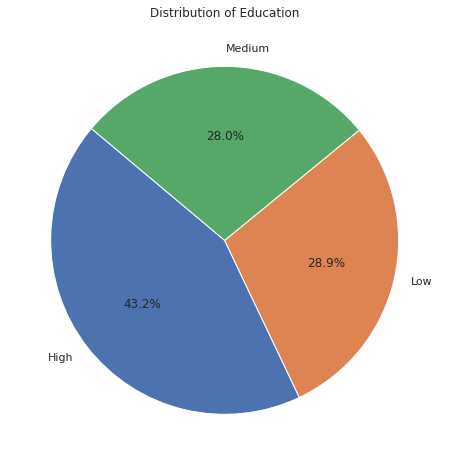

In [28]:
# DP 3.3.1 - derive "Education" into "Education_group"
from pyspark.sql.functions import when
df = df.withColumn(
    "Education_group",
    when(col("Education") == "High School", "Medium")
    .when(col("Education") == "Middle School", "Low")
    .when(col("Education") == "Colledge or Higher", "High")
    .when(col("Education") == "Primary School", "Low")
)

# Show the resulting DataFrame to verify the new column
df_pandas = df.select("Education_group").toPandas()
value_counts = df_pandas["Education_group"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education')
plt.show()

In [29]:
# DP 3.5.1 - The quantity and distribution of the original dataset
df.describe().show()

+-------+--------------------+-------------------+------------------+-------------------+-----------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+-------------------+------------------+------------------+------------------+------------------+----------+---------------+
|summary|HeartDiseaseorAttack|             HighBP|          HighChol|          CholCheck|              BMI|             Smoker|              Stroke|          Diabetes|      PhysActivity|            Fruits|            Veggies|  HvyAlcoholConsump|        NoDocbcCost|           GenHlth|          MentHlth|         PhysHlth|           DiffWalk|                Sex|               Age|         Education|            Income|                ID|DB_Section|Education_group|
+-------+--------------------+-------------------+------------------+-

In [30]:
# DP 3.5.1 - Sample 40%  and the result
df = df.sample(withReplacement=False, fraction=0.4)
df.describe().show()

+-------+--------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+-----------------+----------+---------------+
|summary|HeartDiseaseorAttack|             HighBP|           HighChol|          CholCheck|               BMI|            Smoker|             Stroke|           Diabetes|      PhysActivity|             Fruits|            Veggies|  HvyAlcoholConsump|       NoDocbcCost|           GenHlth|          MentHlth|          PhysHlth|           DiffWalk|                Sex|              Age|         Education|            Income|               ID|DB_Section|Education_group|
+-------+--------------------+-------------------+-------------------+

In [31]:
# DP 3.5.2 - Trimming "Education"
df.printSchema()

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = false)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = false)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: double (nullable = true)
 |-- ID: double (nullable = true)
 |-- DB_Section: double (nullable = true)
 |-- Education_group: string (nullable = true)



In [32]:
# DP 3.5.2 - Trimming "Education"
df = df.drop("Education")
df.printSchema()

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = false)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = false)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Income: double (nullable = true)
 |-- ID: double (nullable = true)
 |-- DB_Section: double (nullable = true)
 |-- Education_group: string (nullable = true)



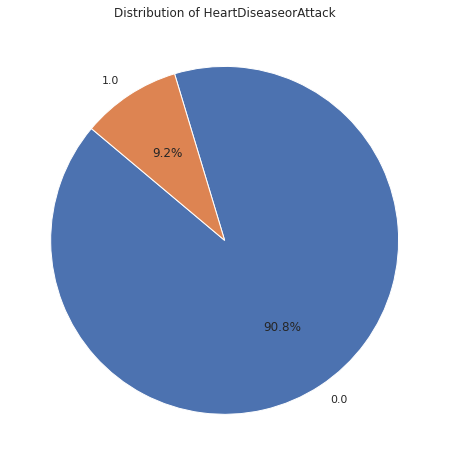

In [33]:
#DT - 4.1.1 - “HeartDiseaseorAttack” distribution
df_pandas = df.select("HeartDiseaseorAttack").toPandas()
value_counts = df_pandas["HeartDiseaseorAttack"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of HeartDiseaseorAttack')
plt.show()

dataframe row count after undersampling: 18164


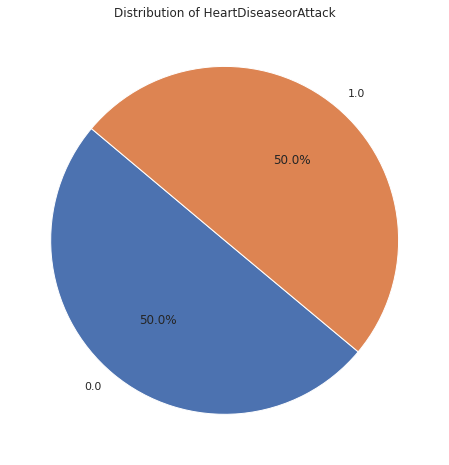

In [34]:
#DT - 4.1.1 - Undersampling
class_counts = df.groupBy("HeartDiseaseorAttack").count().collect()
class_0_count = next(row['count'] for row in class_counts if row['HeartDiseaseorAttack'] == 0)
class_1_count = next(row['count'] for row in class_counts if row['HeartDiseaseorAttack'] == 1)
minority_class_count = min(class_0_count, class_1_count)

# Separate the majority and minority class DataFrames
df_class_0 = df.filter(col("HeartDiseaseorAttack") == 0)
df_class_1 = df.filter(col("HeartDiseaseorAttack") == 1)
# Sample the majority class to balance the dataset
df_class_0 = df_class_0.sample(withReplacement=False, fraction=minority_class_count / class_0_count)
df = df_class_0.union(df_class_1)
print("dataframe row count after undersampling:", df.count())
df_pandas = df.select("HeartDiseaseorAttack").toPandas()
value_counts = df_pandas["HeartDiseaseorAttack"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of HeartDiseaseorAttack')
plt.show()

In [35]:
#DT - 4.1.2 - Delete “ID” and “DB_Section”
df = df.drop("ID", "DB_Section")
df.describe().show()

+-------+--------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-------------------+------------------+-----------------+-----------------+-------------------+------------------+------------------+------------------+---------------+
|summary|HeartDiseaseorAttack|            HighBP|           HighChol|          CholCheck|               BMI|            Smoker|             Stroke|           Diabetes|       PhysActivity|             Fruits|           Veggies|   HvyAlcoholConsump|        NoDocbcCost|           GenHlth|         MentHlth|         PhysHlth|           DiffWalk|               Sex|               Age|            Income|Education_group|
+-------+--------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


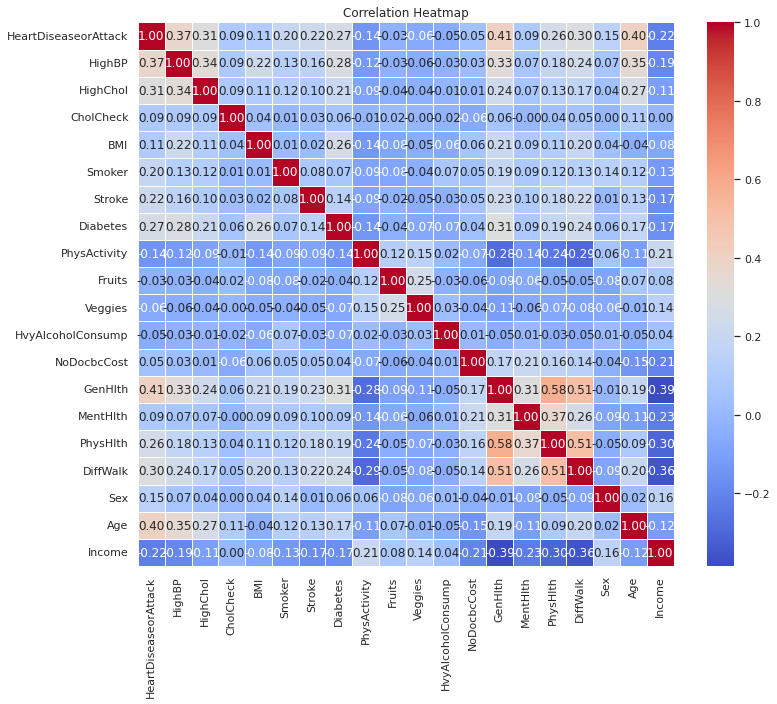

In [36]:
#DT - 4.1.3 - Correlation analysis
df_tmp = df.drop("Education_group")
assembler = VectorAssembler(inputCols=df_tmp.columns, outputCol="features", handleInvalid = "skip")
df_vector = assembler.transform(df_tmp).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]
correlation_matrix = correlation_matrix.toArray()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=df_tmp.columns, yticklabels=df_tmp.columns)
plt.title("Correlation Heatmap")
plt.show()

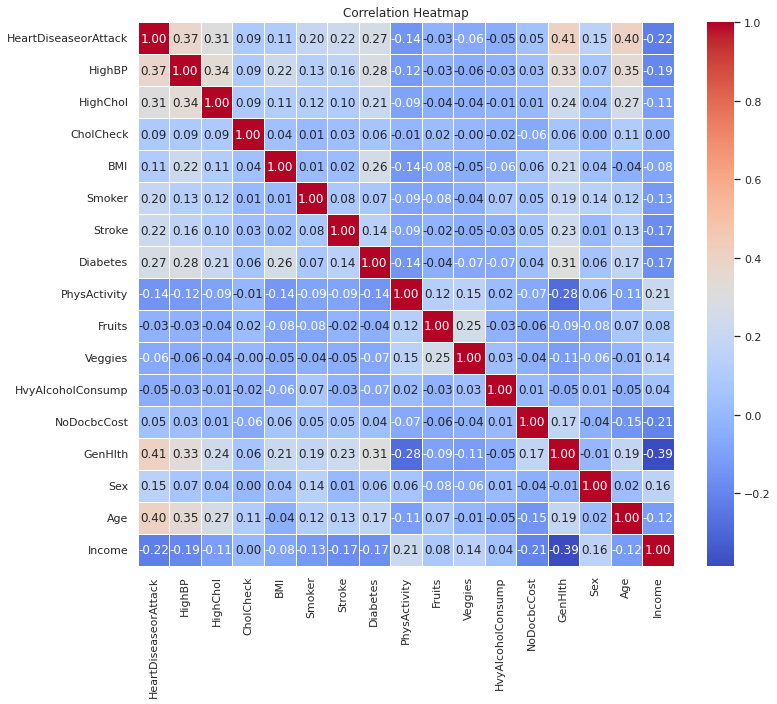

In [37]:
#DT - 4.1.3 - Delete "MentHlth", "PhysHlth" and "DiffWalk", and the result.
df = df.drop("MentHlth", "PhysHlth", "DiffWalk")
df_tmp = df.drop("Education_group")
assembler = VectorAssembler(inputCols=df_tmp.columns, outputCol="features", handleInvalid = "skip")
df_vector = assembler.transform(df_tmp).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]
correlation_matrix = correlation_matrix.toArray()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, xticklabels=df_tmp.columns, yticklabels=df_tmp.columns)
plt.title("Correlation Heatmap")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

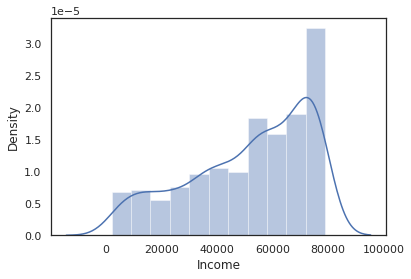

In [38]:
#DT - 4.2.1 - "Income" density plot
tmp_df = df.select("Income").toPandas()
sns.distplot(tmp_df['Income'].sample(1000))

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

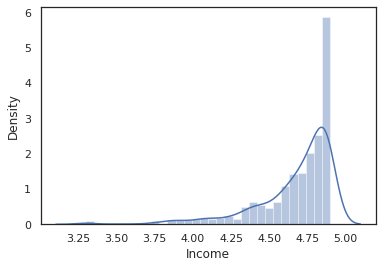

In [39]:
#DT - 4.2.1 - taking the log10 of the "Income" feature, and the result
from pyspark.sql.functions import log10
df = df.withColumn("Income", log10("Income"))
tmp_df = df.select("Income").toPandas()
sns.distplot(tmp_df['Income'].sample(1000))

In [40]:
#DT - 4.2.2 - one hot encoding "Education_group"
df = df.withColumn("Education_Low", when(col("Education_group") == "Low", 1).otherwise(0))
df = df.withColumn("Education_Medium", when(col("Education_group") == "Medium", 1).otherwise(0))
df = df.drop("Education_group")
df.describe().show()

+-------+--------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|HeartDiseaseorAttack|            HighBP|           HighChol|          CholCheck|               BMI|            Smoker|             Stroke|           Diabetes|       PhysActivity|             Fruits|           Veggies|   HvyAlcoholConsump|        NoDocbcCost|           GenHlth|               Sex|               Age|            Income|      Education_Low|   Education_Medium|
+-------+--------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------

In [40]:
#DMM 5.1 - Data types
#determine column type
def column_type(column):
    unique_values = column.distinct().count()
    if unique_values == 2:
        return "binary"
    elif (unique_values < 5):
        return "categorical"
    else:
        return "numerical"

column_types = {}

# Iterate through each column
for column in df.columns:
    column_types[column] = column_type(df.select(column))

for column, type_ in column_types.items():
    print(f"'{column}': {type_}")

'HeartDiseaseorAttack': binary
'HighBP': binary
'HighChol': binary
'CholCheck': binary
'BMI': numerical
'Smoker': binary
'Stroke': binary
'Diabetes': categorical
'PhysActivity': binary
'Fruits': binary
'Veggies': binary
'HvyAlcoholConsump': binary
'NoDocbcCost': binary
'GenHlth': numerical
'Sex': binary
'Age': numerical
'Income': numerical
'Education_Low': binary
'Education_Medium': binary


In [57]:

#DMA 6.2.1 - Decision tree
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql import SparkSession


# Assembler
feature_columns = df.columns
feature_columns.remove("HeartDiseaseorAttack")
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")
train_data, test_data = df_tmp.randomSplit([0.8, 0.2], seed=123)

# The DT model
dt = DecisionTreeClassifier(labelCol="HeartDiseaseorAttack", featuresCol="features")


# cross-validation parameter grid minWeightFractionPerNode
paramGrid = ParamGridBuilder() \
    .addGrid(dt.impurity, ['entropy']) \
    .addGrid(dt.maxDepth, [5]) \
    .addGrid(dt.minInstancesPerNode, [25, 50,100]) \
    .addGrid(dt.minInfoGain, [0.0,10e-4]) \
    .addGrid(dt.thresholds, [[0.5,0.5]]) \
    .build()

# evaluator, metricName="areaUnderROC"
binary_evaluator = BinaryClassificationEvaluator(labelCol="HeartDiseaseorAttack", metricName="areaUnderROC")


# cross validator
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=binary_evaluator,
                          numFolds=10)

# cross-validation 
cvModel = crossval.fit(train_data)


# output the best model and the best params 
bestModel = cvModel.bestModel
best_params = {param[0].name: param[1] for param in bestModel.extractParamMap().items() if param[0].name in \
               ['impurity', 'maxDepth', 'minInstancesPerNode', 'minInfoGain']}
print(f"Best Parameters: {best_params}")


# Calculate the average AUC
avgMetrics = cvModel.avgMetrics
averageAUC = sum(avgMetrics) / len(avgMetrics)
print(f"10-Fold Average AUC: {averageAUC}") # averageAUC

# Evaluate the best model on the testing dataset
predictions = bestModel.transform(test_data)

# Confusion matrix
confusion_mat = predictions.groupBy('HeartDiseaseorAttack', 'prediction').count()
fn = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 1)) \
.select('count').collect()[0]['count'])
tn = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 0)) \
.select('count').collect()[0]['count'])
tp = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 1)) \
.select('count').collect()[0]['count'])
fp = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 0)) \
.select('count').collect()[0]['count'])
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("Test Confusion Matrix:")
print(f'true negative:{tn}, false positive:{fp}, false negative:{fn}, true positive:{tp}')
print(f"Test Recall: {recall}")
print(f"Test Precision: {precision}")
print(f"Test Accuracy: {accuracy}")



Best Parameters: {'impurity': 'entropy', 'maxDepth': 5, 'minInfoGain': 0.0, 'minInstancesPerNode': 50}
10-Fold Average AUC: 0.7345758287411298


Test Confusion Matrix:
true negative:1240, false positive:375, false negative:504, true positive:1428
Test Recall: 0.7391304347826086
Test Precision: 0.7920133111480865
Test Accuracy: 0.7521849450239639


In [58]:
#DMA 6.2.2 - Logistic regression

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql import SparkSession


# Assembler
feature_columns = df.columns
feature_columns.remove("HeartDiseaseorAttack")
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")
train_data, test_data = df_tmp.randomSplit([0.8, 0.2], seed=123)

# The Logistic Regression model
lr = LogisticRegression(labelCol="HeartDiseaseorAttack", featuresCol="features")


# cross-validation parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5]) \
    .addGrid(lr.aggregationDepth, [2, 3]) \
    .addGrid(lr.maxIter, [50, 100]) \
    .build()

# evaluator, metricName="areaUnderROC"
binary_evaluator = BinaryClassificationEvaluator(labelCol="HeartDiseaseorAttack", metricName="areaUnderROC")


# cross validator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=binary_evaluator,
                          numFolds=10)

# cross-validation 
cvModel = crossval.fit(train_data)


# output the best model and the best params 
bestModel = cvModel.bestModel
best_params = {param[0].name: param[1] for param in bestModel.extractParamMap().items() if param[0].name in \
               ['regParam', 'elasticNetParam', 'aggregationDepth', 'maxIter']}
print(f"Best Parameters: {best_params}")


# Calculate the average AUC
avgMetrics = cvModel.avgMetrics
averageAUC = sum(avgMetrics) / len(avgMetrics)
print(f"10-Fold Average AUC: {averageAUC}") # averageAUC

# Evaluate the best model on the testing dataset
predictions = bestModel.transform(test_data)

# Confusion matrix
confusion_mat = predictions.groupBy('HeartDiseaseorAttack', 'prediction').count()
fn = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 1)) \
.select('count').collect()[0]['count'])
tn = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 0)) \
.select('count').collect()[0]['count'])
tp = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 1)) \
.select('count').collect()[0]['count'])
fp = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 0)) \
.select('count').collect()[0]['count'])
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("Test Confusion Matrix:")
print(f'true negative:{tn}, false positive:{fp}, false negative:{fn}, true positive:{tp}')
print(f"Test Recall: {recall}")
print(f"Test Precision: {precision}")
print(f"Test Accuracy: {accuracy}")


Best Parameters: {'aggregationDepth': 2, 'elasticNetParam': 0.5, 'maxIter': 50, 'regParam': 0.01}
10-Fold Average AUC: 0.838126342081199


Test Confusion Matrix:
true negative:1318, false positive:410, false negative:426, true positive:1393
Test Recall: 0.765805387575591
Test Precision: 0.7726012201885746
Test Accuracy: 0.7643078658020863


In [62]:
#DMA 6.2.3 - PCA Analysis
from pyspark.ml.feature import PCA
import numpy as np
# Assembler
feature_columns = df.columns
feature_columns.remove("HeartDiseaseorAttack")
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")


# Run PCA
pca = PCA(k=5, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(df_tmp)

# Transform the data using the PCA model
pca_result = pca_model.transform(df_tmp).select("pcaFeatures")
components = pca_model.pc.toArray()
loadings_first_pc = np.abs(components[:, 0])

# Get indices of the top 5 features
top_5_indices = np.argsort(loadings_first_pc)[-5:][::-1]

top_5_features = [feature_columns[i] for i in top_5_indices]
print("Top 5 features contributing to the first principal component:")
print(top_5_features)

Top 5 features contributing to the first principal component:
['Age', 'BMI', 'GenHlth', 'HighBP', 'Diabetes']


In [78]:
#DMA 6.2.4 - K-Means
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Assembler - only use the top 5 features from the PCA Analysis
feature_columns = ['Age', 'BMI', 'GenHlth', 'HighBP', 'Diabetes']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")

kmeans = KMeans(k=2, featuresCol="features")
km = kmeans.fit(df_tmp)
predictions = km.transform(df_tmp)
# print the silhouette score
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette}")

cluster_0_positive = predictions.filter((predictions.HeartDiseaseorAttack == 1) & (predictions.prediction == 0)).count()
cluster_0_negative = predictions.filter((predictions.HeartDiseaseorAttack == 0) & (predictions.prediction == 0)).count()
cluster_1_positive = predictions.filter((predictions.HeartDiseaseorAttack == 1) & (predictions.prediction == 1)).count()
cluster_1_negative = predictions.filter((predictions.HeartDiseaseorAttack == 0) & (predictions.prediction == 1)).count()

cluster_0_positive_rate = cluster_0_positive / (cluster_0_positive + cluster_0_negative)
cluster_1_positive_rate = cluster_1_positive / (cluster_1_positive + cluster_1_negative)

print("positive rate of cluster 0 is", cluster_0_positive_rate)
print("positive rate of cluster 1 is", cluster_1_positive_rate)

Silhouette Score: 0.6763721484565312


positive rate of cluster 0 is 0.27641009660330323
positive rate of cluster 1 is 0.6260500562916775


In [69]:
#DMA 6.3 - The Decision Tree model
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql import SparkSession


def train_DecisionTreeModel(train_data):
    # The DT model
    dt = DecisionTreeClassifier(labelCol="HeartDiseaseorAttack", featuresCol="features")

    threshold = 0.25

    # cross-validation parameter grid minWeightFractionPerNode
    paramGrid = ParamGridBuilder() \
        .addGrid(dt.impurity, ['entropy']) \
        .addGrid(dt.maxDepth, [5]) \
        .addGrid(dt.minInstancesPerNode, [50]) \
        .addGrid(dt.minInfoGain, [0.035]) \
        .addGrid(dt.thresholds, [[threshold,1-threshold]]) \
        .build()

    # evaluator, metricName="areaUnderROC"
    binary_evaluator = BinaryClassificationEvaluator(labelCol="HeartDiseaseorAttack", metricName="areaUnderROC")


    # cross validator
    crossval = CrossValidator(estimator=dt,
                              estimatorParamMaps=paramGrid,
                              evaluator=binary_evaluator,
                              numFolds=10)

    # cross-validation 
    cvModel = crossval.fit(train_data)


    # output the best model and the best params 
    bestModel = cvModel.bestModel
    best_params = {param[0].name: param[1] for param in bestModel.extractParamMap().items() if param[0].name in \
                   ['impurity', 'maxDepth', 'minInstancesPerNode', 'thresholds','minInfoGain']}
    print(f"Best Parameters: {best_params}")


    # Calculate the average AUC
    avgMetrics = cvModel.avgMetrics
    averageAUC = sum(avgMetrics) / len(avgMetrics)
    print(f"10-Fold Average AUC: {averageAUC}") # averageAUC
    return bestModel

def test_DecisionTreeModel(model, test_data):
    # Evaluate the best model on the testing dataset
    predictions = model.transform(test_data)

    #AUC score
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="HeartDiseaseorAttack", metricName="areaUnderROC")
    auc_score = evaluator.evaluate(predictions)
    print("Testing AUC Score:", auc_score)
    
    # Confusion matrix
    confusion_mat = predictions.groupBy('HeartDiseaseorAttack', 'prediction').count()
    def get_count(df, condition):
        row = confusion_mat.filter(condition).select('count').first()
        return int(row['count']) if row else 1
    fn = get_count(confusion_mat, (confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 1))
    tn = get_count(confusion_mat, (confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 0))
    tp = get_count(confusion_mat, (confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 1))
    fp = get_count(confusion_mat, (confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 0))
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    
    print("------")
    print("Test Confusion Matrix:")
    print(f'true negative:{tn}, false positive:{fp}, false negative:{fn}, true positive:{tp}')
    print(f"Test Recall: {recall}")
    print(f"Test Precision: {precision}")
    print(f"Test Accuracy: {accuracy}")
    



In [70]:
#DM 7.1 - Train-test split
# Assembler
feature_columns = df.columns
feature_columns.remove("HeartDiseaseorAttack")
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")
train_data, test_data = df_tmp.randomSplit([0.8, 0.2], seed=123)



In [71]:
#DM 7.2.1 - Conducting data mining (training)
model = train_DecisionTreeModel(train_data)

Best Parameters: {'impurity': 'entropy', 'maxDepth': 5, 'minInfoGain': 0.035, 'minInstancesPerNode': 50, 'thresholds': [0.25, 0.75]}
10-Fold Average AUC: 0.7432394183695967


In [44]:
#DM 7.2.2 - Conducting data mining (testing)
test_DecisionTreeModel(model, test_data)
print("Test dataset row count:", test_data.count())

Testing AUC Score: 0.7859915089637155


------
Test Confusion Matrix:
true negative:1630, false positive:1175, false negative:133, true positive:640
Test Recall: 0.8279430789133247
Test Precision: 0.3526170798898072
Test Accuracy: 0.6344326439351593


Test dataset row count: 3578


In [44]:
#DM 7.3.1 - Plot decision tree
import re
def replace_features(str_text, str_arr):
    for i, not_used in enumerate(str_arr):
        index = len(str_arr) - 1 - i
        # Creating a pattern for 'feature' followed by one or more digits
        pattern = rf'feature {index}'
        str_text = re.sub(pattern, str_arr[index], str_text)
    return str_text
print(replace_features(model.toDebugString, feature_columns))


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_7ad970ced992, depth=5, numNodes=19, numClasses=2, numFeatures=18
  If (HighBP <= 0.5)
   If (Age <= 57.5)
    If (GenHlth <= 2.5)
     Predict: 0.0
    Else (GenHlth > 2.5)
     If (Stroke <= 0.5)
      Predict: 0.0
     Else (Stroke > 0.5)
      Predict: 1.0
   Else (Age > 57.5)
    If (GenHlth <= 2.5)
     If (Sex <= 0.5)
      Predict: 0.0
     Else (Sex > 0.5)
      If (Age <= 62.5)
       Predict: 0.0
      Else (Age > 62.5)
       Predict: 1.0
    Else (GenHlth > 2.5)
     Predict: 1.0
  Else (HighBP > 0.5)
   If (GenHlth <= 3.5)
    If (Age <= 57.5)
     Predict: 0.0
    Else (Age > 57.5)
     Predict: 1.0
   Else (GenHlth > 3.5)
    Predict: 1.0



In [45]:
#DM 7.3.2 - output the top 5 features
importances = model.featureImportances
feature_importances = sorted(zip(importances, feature_columns[:-1]), reverse=True)
top_features = feature_importances[:5]
for importance, feature in top_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: HighBP, Importance: 0.4354118732622308
Feature: GenHlth, Importance: 0.2727494434542034
Feature: Age, Importance: 0.24822258457872157
Feature: Sex, Importance: 0.024974777546038676
Feature: Stroke, Importance: 0.018641321158805457


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='HighBP'>

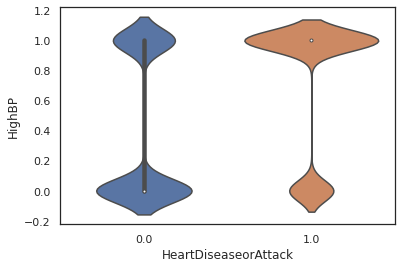

In [46]:
df_pd = df.toPandas()
#Interprtation 8.2.1 - The pattern #1 [HighBP and HeartDiseaseorAttack]
sns.violinplot(x='HeartDiseaseorAttack', y='HighBP', data=df_pd)

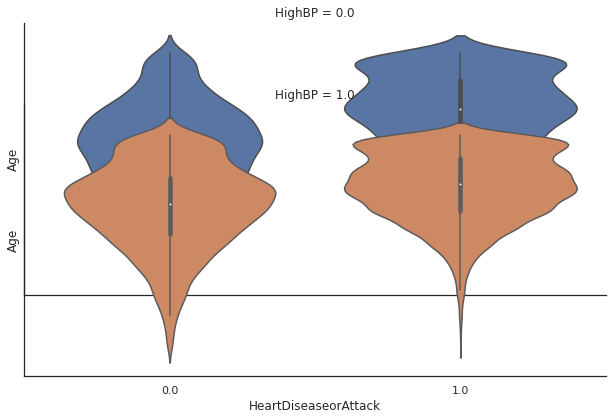

In [47]:
#Interprtation 8.2.1 - The pattern #2 [HighBP, Age and HeartDiseaseorAttack]
sns.set_theme(style="white", rc={"axes.facecolor": (0,0,0,0)})
sns.FacetGrid(df_pd, row='HighBP', hue='HighBP', aspect=3).map_dataframe(sns.violinplot, x='HeartDiseaseorAttack', y='Age', fill='False', alpha=0.5).\
set(yticks=[],ylabel='Age').figure.subplots_adjust(hspace=-0.70)

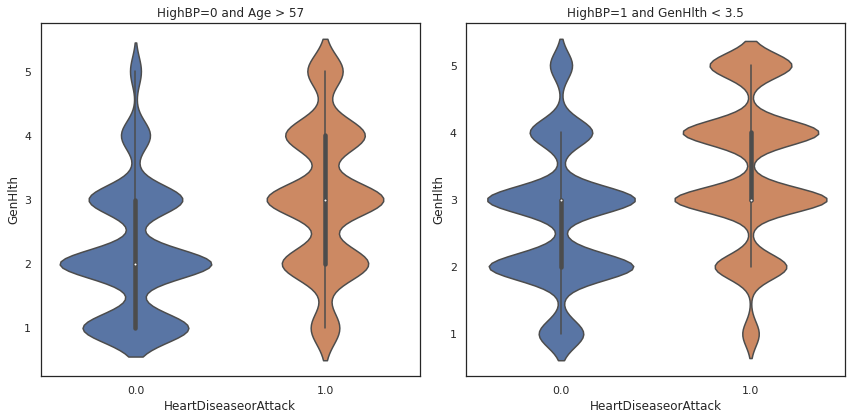

In [54]:
#Interprtation 8.2.1 - The pattern #3 [HighBP, Age, GenHlth and HeartDiseaseorAttack] 
plt.clf()
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title("HighBP=0 and Age > 57")
sub_df1 = df_pd[(df_pd["HighBP"] == 0) & (df_pd["Age"] > 57)]
sns.violinplot(x='HeartDiseaseorAttack', y='GenHlth', data=sub_df1, ax=axs[0])
axs[1].set_title("HighBP=1 and GenHlth < 3.5")
sub_df2 = df_pd[(df_pd["HighBP"] == 1)]
sns.violinplot(x='HeartDiseaseorAttack', y='GenHlth', data=sub_df2, ax=axs[1])
plt.tight_layout()
plt.show()

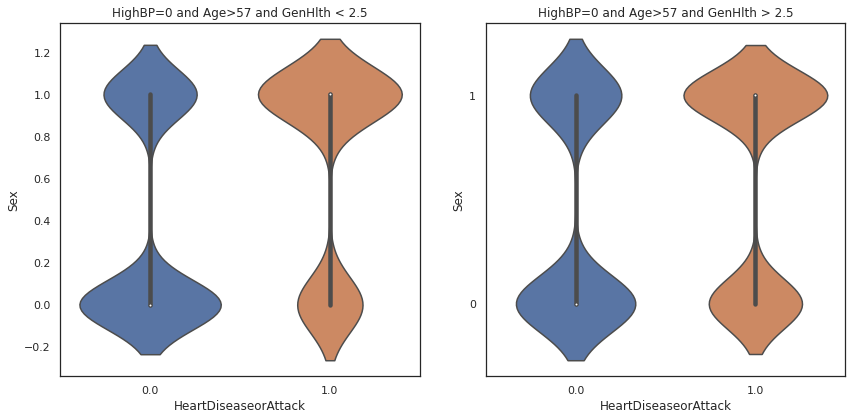

In [58]:
plt.clf()
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title("HighBP=0 and Age>57 and GenHlth < 2.5")
sub_df1 = df_pd[(df_pd["HighBP"] == 0) & (df_pd["Age"] > 57) & (df_pd["GenHlth"] < 2.5)]
sns.violinplot(x='HeartDiseaseorAttack', y='Sex', data=sub_df1, ax=axs[0])
axs[1].set_title("HighBP=0 and Age>57 and GenHlth > 2.5")
sub_df2 = df_pd[(df_pd["HighBP"] == 0) & (df_pd["Age"] > 57) & (df_pd["GenHlth"] >= 2.5)]
sns.violinplot(x='HeartDiseaseorAttack', y='Sex', data=sub_df2, ax=axs[1])
plt.tight_layout()
plt.gca().set_yticks([0, 1])
plt.show()

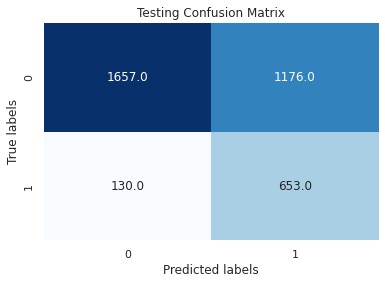

In [61]:
#Interprtation 8.2.2 - Visualize Testing confusion matrix
tn = 1657
fp = 1176
fn = 130
tp = 653

conf_matrix = np.array([[tn, fp], [fn, tp]])

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Testing Confusion Matrix')
plt.show()

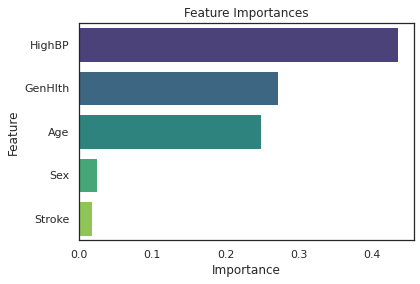

In [62]:
#Interprtation 8.2.2 - Visualize feature importance
feature_names = ['HighBP', 'GenHlth', 'Age', 'Sex', 'Stroke']
importances = [0.435, 0.272, 0.248, 0.024, 0.018]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [51]:
#8.4.1 - Manual Cross validation (To evaluate the model)
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import when


def cross_val(df, number_of_folds, model):
    # Split the df into [number_of_folds] sub-dfs
    weights = [0.1] * number_of_folds
    df_array = df.randomSplit(weights, seed=2)
    
    # Confusion matrix
    tn, fp, fn, tp, cv_auc = 0,0,0,0,0
    for current_fold in range(0, number_of_folds):
        df_train = None
        df_test = None
        
        # Split train/test data for the current fold
        for i, sub_df in enumerate(df_array):
            if i==current_fold:
                df_test = sub_df
            else:
                df_train = sub_df if df_train==None else df_train.union(sub_df)
        # Pipeline
        pipeline = Pipeline(stages=[model])
        
        # Train
        model_trained = pipeline.fit(df_train)
        
        # Test
        predictions = model_trained.transform(df_test)
        
        
        # Select (prediction, true label) and compute confusion matrix
        confusion_mat = predictions.groupBy('HeartDiseaseorAttack', 'prediction').count()
        fn_ = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 1)) \
        .select('count').collect()[0]['count'])
        tn_ = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 0) & (confusion_mat.prediction == 0)) \
        .select('count').collect()[0]['count'])
        tp_ = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 1)) \
        .select('count').collect()[0]['count'])
        fp_ = int(confusion_mat.filter((confusion_mat.HeartDiseaseorAttack == 1) & (confusion_mat.prediction == 0)) \
        .select('count').collect()[0]['count'])
        
        # Calculate auc score for the current fold
        binary_evaluator = BinaryClassificationEvaluator(labelCol="HeartDiseaseorAttack")
        auc_score = binary_evaluator.evaluate(predictions)
        
        cv_auc += auc_score
        tn += tn_
        fp += fp_
        fn += fn_
        tp += tp_

    # Calculate average confusion matrix
    cv_auc /= number_of_folds
    tn /= number_of_folds
    fp /= number_of_folds
    fn /= number_of_folds
    tp /= number_of_folds
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    # Output metrics
    print("10-fold Average Confusion Matrix:")
    print(f'true negative:{tn}, false positive:{fp}, false negative:{fn}, true positive:{tp}')
    print("10-fold Average Recall:", recall)
    print("10-fold Average AUC Score:", cv_auc)
    print("10-fold Average Precision:", precision)
    print("10-fold Average Accuracy:", accuracy)


# Do cross validation
cross_val(train_data, number_of_folds=10, model = model)

10-fold Average Confusion Matrix:
true negative:3359.5, false positive:2317.0, false negative:304.0, true positive:1312.5
10-fold Average Recall: 0.8119393751933189
10-fold Average AUC Score: 0.7821448467549124
10-fold Average Precision: 0.36162005785920925
10-fold Average Accuracy: 0.6406142876731112


In [68]:
#8.4.1 - Clustering Evaluation
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Assembler - only use the top 5 features from the PCA Analysis
feature_columns = ['HighBP', 'GenHlth', 'Age', 'Sex', 'Stroke']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_tmp = assembler.transform(df).select("features", "HeartDiseaseorAttack")

kmeans = KMeans(k=2, featuresCol="features")
km = kmeans.fit(df_tmp)

predictions = km.transform(df_tmp)
# print the silhouette score
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette}")


cluster_0_positive = predictions.filter((predictions.HeartDiseaseorAttack == 1) & (predictions.prediction == 0)).count()
cluster_0_negative = predictions.filter((predictions.HeartDiseaseorAttack == 0) & (predictions.prediction == 0)).count()
cluster_1_positive = predictions.filter((predictions.HeartDiseaseorAttack == 1) & (predictions.prediction == 1)).count()
cluster_1_negative = predictions.filter((predictions.HeartDiseaseorAttack == 0) & (predictions.prediction == 1)).count()

cluster_0_positive_rate = cluster_0_positive / (cluster_0_positive + cluster_0_negative)
cluster_1_positive_rate = cluster_1_positive / (cluster_1_positive + cluster_1_negative)

print("positive rate of cluster 0 is", cluster_0_positive_rate)
print("positive rate of cluster 1 is", cluster_1_positive_rate)

Silhouette Score: 0.7426894773119627


positive rate of cluster 0 is 0.6201409034397016
positive rate of cluster 1 is 0.26713758227644885
